### Installing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading datasets

In [2]:
trader_df = pd.read_csv("/content/historical_data.csv")
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")

In [3]:
trader_df.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12


In [4]:
sentiment_df.head(2)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02


### Converting dates to proper format

In [5]:
trader_df["date"] = pd.to_datetime(trader_df["Timestamp IST"], dayfirst=True).dt.date
trader_df.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02


In [6]:
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"]).dt.date

### Merge on date

In [7]:
merged_df = pd.merge(trader_df, sentiment_df, on="date")
display(merged_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


In [8]:
merged_df.to_csv("/content/cleaned_data.csv",index=False)

### EDA and Visualizations

Basic summary by sentiments

In [9]:
stats = merged_df.groupby("classification").agg({
    "Closed PnL":["mean","median"],
    "Size USD":["mean","median"],
    "Account":"nunique"
}).reset_index()
display(stats)

classification Closed PnL            Size USD          Account
                       mean median         mean   median nunique
0   Extreme Fear  34.537862    0.0  5349.731843  766.150      32
1  Extreme Greed  67.892861    0.0  3112.251565  500.050      30
2           Fear  54.290400    0.0  7816.109931  735.960      32
3          Greed  42.743559    0.0  5736.884375  555.000      31
4        Neutral  34.307718    0.0  4782.732661  547.655      31

rename columns

In [10]:
stats.columns = ["Classification","Avg_PnL","Median_PnL","Avg_Size_USD","Median_Size_USD","Unique_Traders"]
print(stats)

  Classification    Avg_PnL  Median_PnL  Avg_Size_USD  Median_Size_USD  \
0   Extreme Fear  34.537862         0.0   5349.731843          766.150   
1  Extreme Greed  67.892861         0.0   3112.251565          500.050   
2           Fear  54.290400         0.0   7816.109931          735.960   
3          Greed  42.743559         0.0   5736.884375          555.000   
4        Neutral  34.307718         0.0   4782.732661          547.655   

   Unique_Traders  
0              32  
1              30  
2              32  
3              31  
4              31  


Saving for repo

In [11]:
stats.to_csv("/content/sentiment_stats.csv",index=False)

PnL comparison plot

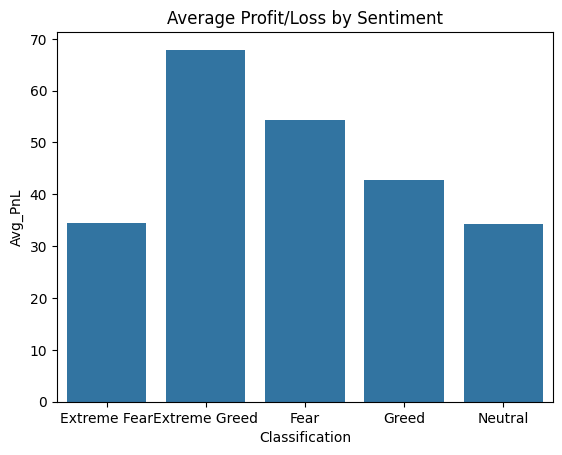

In [12]:
sns.barplot(data=stats,x="Classification",y="Avg_PnL")
plt.title("Average Profit/Loss by Sentiment")
plt.savefig("/content/pnl_by_sentiment.png")
plt.show()

Leverage comparison

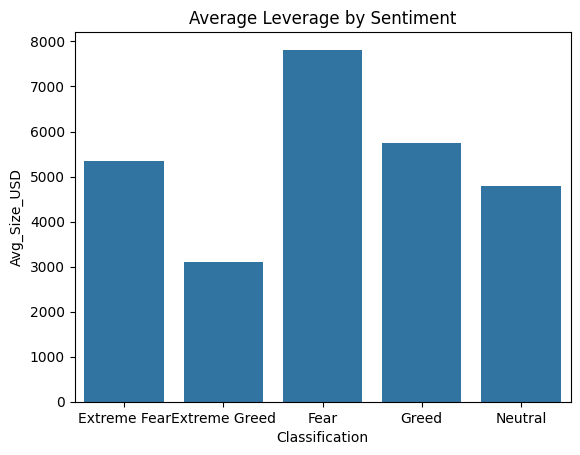

In [13]:
sns.barplot(data=stats,x="Classification",y="Avg_Size_USD")
plt.title("Average Leverage by Sentiment")
plt.savefig("/content/leverage_by_sentiment.png")
plt.show()